# Сегментация изображения Машин dataset взят с Kaggle

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

from PIL import Image

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, Conv2D, MaxPooling2D, Activation
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml_segment/car/train_masks.csv/train_masks.csv')
df.shape

(5088, 2)

In [ ]:
train_df = df[:4000]
val_df = df[4000:]

In [ ]:
def keras_generator(gen_df, batch_size):

    while True:

      x_batch = []
      y_batch = []
      
      for i in range(batch_size):
          img_name, mask_rle = gen_df.sample(1).values[0]
          img = cv2.imread('/content/drive/MyDrive/ml_segment/car/train/train/{}'.format(img_name))
          mask = Image.open('/content/drive/MyDrive/ml_segment/car/train_masks/train_masks/{}_mask.gif'.format(img_name[:-4])).resize((256, 256))

          img = cv2.resize(img, (256, 256))
          mask = np.array(mask)
          # print(mask.shape)
          # print(img.shape)
          x_batch += [img]
          y_batch += [mask]

      x_batch = np.array(x_batch) / 255.
      y_batch = np.array(y_batch)
      print(np.expand_dims(y_batch, -1).shape)
      yield x_batch, np.expand_dims(y_batch, -1)

# x_train, y_train = keras_generator(train_df, 25)
# x_test, y_test = keras_generator(val_df, 25)

In [ ]:
for x_train, y_train in keras_generator(train_df, 25):
  break

(25, 256, 256, 1)


In [ ]:
for x_test, y_test in keras_generator(val_df, 25):
  break

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25, 256, 256, 3) (25, 256, 256, 1) (25, 256, 256, 3) (25, 256, 256, 1)


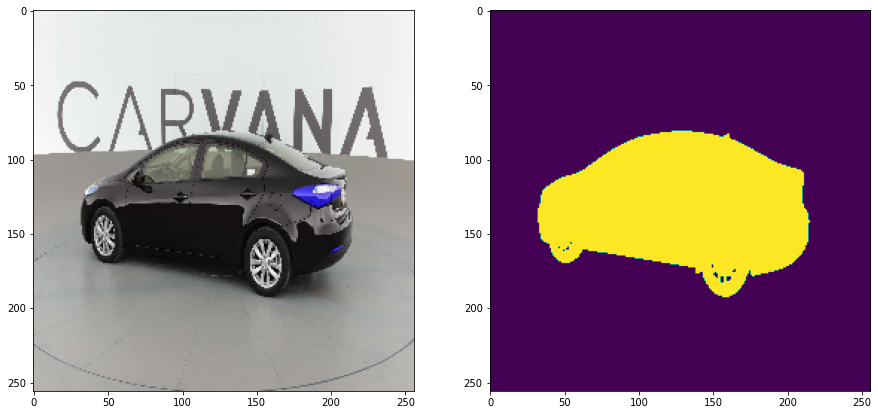

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes[0].imshow(x_train[0])
axes[1].imshow(y_train[0][..., 0])

plt.show()

In [ ]:
def get_model(input_shape):
    """
    Функция должна построить последовательную модель
    """
    model = tf.keras.Sequential([
        Input(input_shape),
        Conv2D(16, (3, 3), padding='SAME'),
        Activation('relu'),
        Conv2D(32, (3, 3), padding='SAME'),
        Activation('relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding="valid"),

        Conv2D(64, (3, 3), padding='SAME'),
        Activation('relu'),
        Conv2D(64, (3, 3), padding='SAME'),
        Activation('relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding="valid"),

        Conv2D(128, (3, 3), padding='SAME'),
        Activation('relu'),
        Conv2D(128, (3, 3), padding='SAME'),
        Activation('relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding="valid"),

        Conv2D(256, (3, 3), padding='SAME'),
        Activation('relu'),
        Conv2D(256, (3, 3), padding='SAME'),
        Activation('relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding="valid"),


        UpSampling2D((2, 2), interpolation='bilinear'),
        Conv2D(256, (3, 3), padding='SAME'),
        Activation('relu'),
        Conv2D(256, (3, 3), padding='SAME'),
        Activation('relu'),

        UpSampling2D((2, 2), interpolation='bilinear'),
        Conv2D(128, (3, 3), padding='SAME'),
        Activation('relu'),
        Conv2D(128, (3, 3), padding='SAME'),
        Activation('relu'),

        UpSampling2D((2, 2), interpolation='bilinear'),
        Conv2D(64, (3, 3), padding='SAME'),
        Activation('relu'),
        Conv2D(32, (3, 3), padding='SAME'),
        Activation('relu'),

        UpSampling2D((2, 2), interpolation='bilinear'),
        Conv2D(16, (3, 3), padding='SAME'),
        Activation('relu'),
        Conv2D(1, (3, 3), padding='SAME'),
        Activation('sigmoid'),
    ])
    return model

model = get_model(input_shape=(256, 256, 3))
model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 activation (Activation)     (None, 256, 256, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                        

In [ ]:
# tf.keras.backend.clear_session()

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
history = model.fit(keras_generator(train_df, 25), 
                    epochs=20, 
                    steps_per_epoch=50, 
                    validation_data=keras_generator(val_df, 25),
                    validation_steps=25)

Epoch 1/20
50/50 [==============================] - 778s 16s/step - loss: 0.4189 - accuracy: 0.8164 - val_loss: 0.1540 - val_accuracy: 0.9401
Epoch 2/20
50/50 [==============================] - 547s 11s/step - loss: 0.1099 - accuracy: 0.9558 - val_loss: 0.0998 - val_accuracy: 0.9563
Epoch 3/20
50/50 [==============================] - 392s 8s/step - loss: 0.0753 - accuracy: 0.9692 - val_loss: 0.0710 - val_accuracy: 0.9714
Epoch 4/20
50/50 [==============================] - 298s 6s/step - loss: 0.0500 - accuracy: 0.9796 - val_loss: 0.0979 - val_accuracy: 0.9678
Epoch 5/20
50/50 [==============================] - 242s 5s/step - loss: 0.0408 - accuracy: 0.9837 - val_loss: 0.0325 - val_accuracy: 0.9868
Epoch 6/20
50/50 [==============================] - 202s 4s/step - loss: 0.0295 - accuracy: 0.9880 - val_loss: 0.0283 - val_accuracy: 0.9882
Epoch 7/20
50/50 [==============================] - 162s 3s/step - loss: 0.0258 - accuracy: 0.9896 - val_loss: 0.0284 - val_accuracy: 0.9881
Epoch 8/20


In [ ]:
frame = pd.DataFrame(history.history)
frame.head();

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

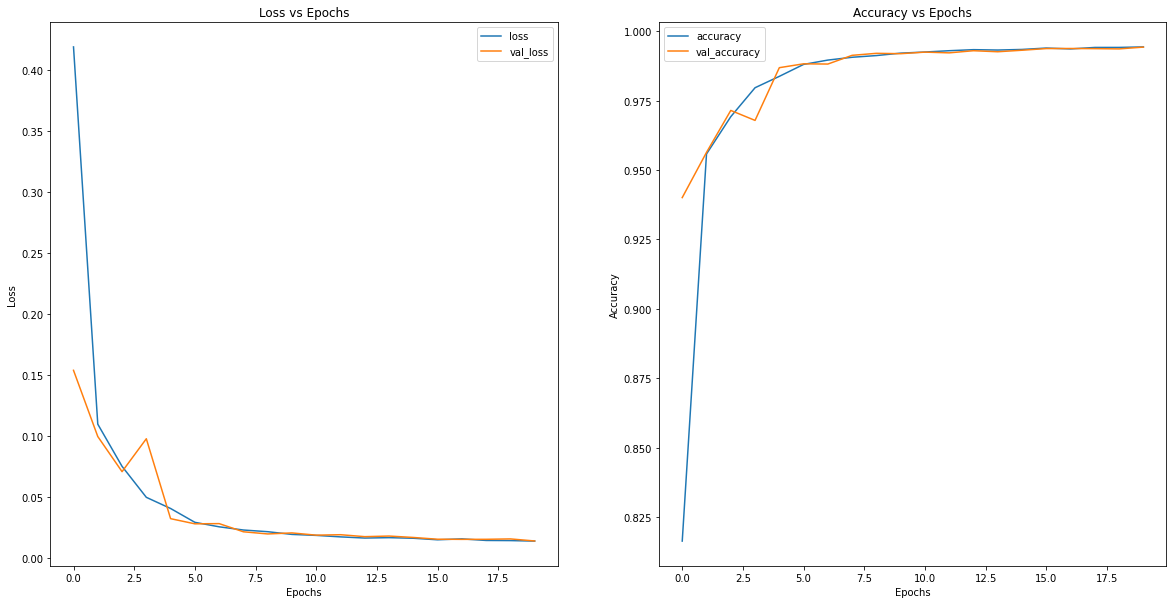

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=True, ax=axes[1])
acc_plot = frame.plot(y="val_accuracy", legend=True, ax=axes[1])
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

acc_plot = frame.plot(y="loss", title="Loss vs Epochs", legend=True, ax=axes[0])
acc_plot = frame.plot(y="val_loss", legend=True, ax=axes[0])
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [ ]:
pred = model.predict(x_test)#.shape

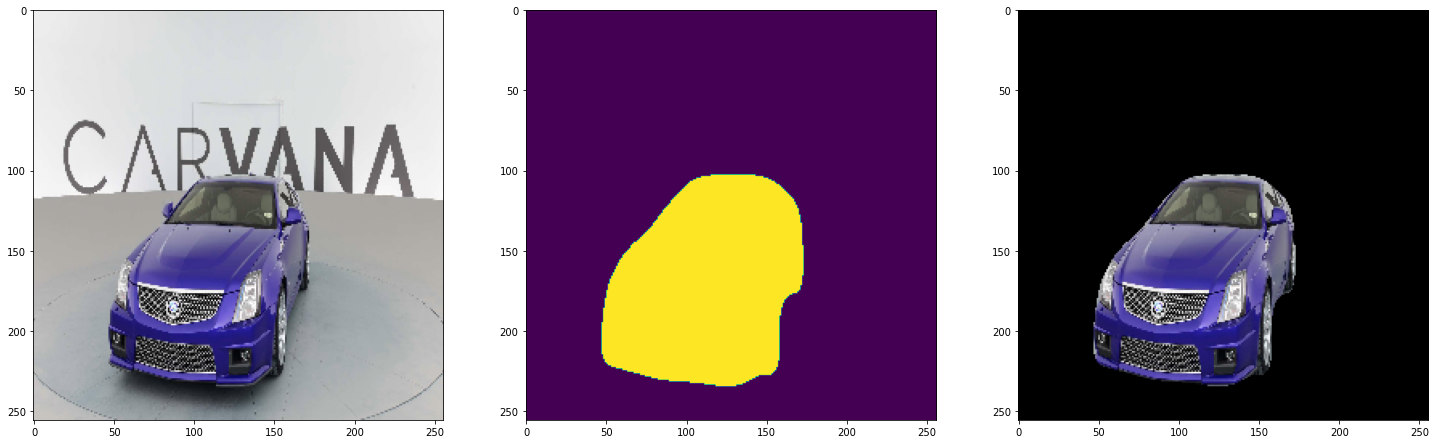

In [ ]:
im_id = 12
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 15))
axes[0].imshow(x_test[im_id])
axes[1].imshow(pred[im_id, ..., 0] > 0.5)
axes[2].imshow(x_test[im_id]*np.expand_dims((pred[im_id, ..., 0] > 0.5) * 1, -1))

plt.show()